In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [63]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df.head(5)
df['target'] = diabetes.target
df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [64]:
df.value_counts()

age        sex        bmi        bp         s1         s2         s3         s4         s5         s6         target
 0.110727   0.050680   0.006728   0.028758  -0.027712  -0.007264  -0.047082   0.034309   0.002004   0.077622  277.0     1
-0.107226  -0.044642  -0.077342  -0.026328  -0.089630  -0.096198   0.026550  -0.076395  -0.042571  -0.005220  137.0     1
                      -0.034229  -0.067642  -0.063487  -0.070520   0.008142  -0.039493  -0.000612  -0.079778  140.0     1
                      -0.011595  -0.040099   0.049341   0.064447  -0.013948   0.034309   0.007027  -0.030072  200.0     1
-0.103593  -0.044642  -0.037463  -0.026328   0.002559   0.019980   0.011824  -0.002592  -0.068332  -0.025930  113.0     1
                                                                                                                       ..
-0.078165   0.050680   0.077863   0.052858   0.078236   0.064447   0.026550  -0.002592   0.040673  -0.009362  233.0     1
-0.074533  -0.044642  -0.0460

In [65]:
x = df[['bmi']]
y = df['target']

In [66]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.4, random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [68]:
print("각 독립변수들의 계수 : ", model.coef_)
print("행렬 rank : ", model.rank_)
print("행렬의 특이값: ", model.singular_)
print("모델의 절편 : ", model.intercept_)
print("fit될 때까지 살펴본 feature의 수 : ", model.n_features_in_)

각 독립변수들의 계수 :  [935.16175035]
행렬 rank :  1
행렬의 특이값:  [0.68632696]
모델의 절편 :  149.71930576055988
fit될 때까지 살펴본 feature의 수 :  1


In [69]:
print("훈련 데이터셋 R^2 : {}".format(model.score(train_x, train_y)))
print("평가용 데이터셋 R^2 : {}".format(model.score(val_x, val_y)))

훈련 데이터셋 R^2 : 0.3315371558919008
평가용 데이터셋 R^2 : 0.40625022857132


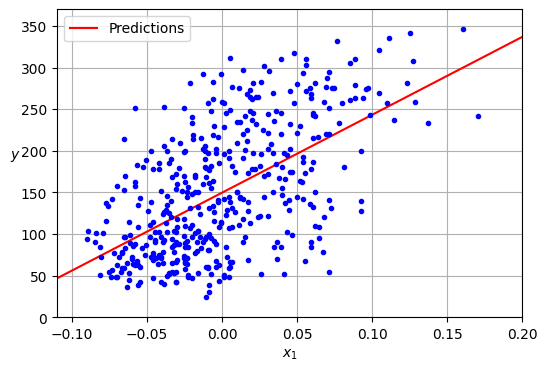

In [70]:
from sklearn.preprocessing import add_dummy_feature
x_new = np.array([[-0.15], [0.25]])
x_new_b = add_dummy_feature(x_new)
theta_best = np.array([[model.intercept_], model.coef_])
y_pred = x_new_b @ theta_best

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(x_new, y_pred, 'r-', label='Predictions')
plt.plot(x, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-0.11, 0.2, 0, 370])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [71]:
# 모델링 2차 학습 및 평가
x = df[['bmi', 'bp', 's6']]
y = df['target']

In [72]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.4, random_state=42)

In [73]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [74]:
print("훈련 데이터셋 R^2 : {}".format(model.score(train_x, train_y)))
print("평가용 데이터셋 R^2 : {}".format(model.score(val_x, val_y)))

훈련 데이터셋 R^2 : 0.40393173961222073
평가용 데이터셋 R^2 : 0.44995306466112284


In [75]:
print(model.coef_)
print(model.intercept_)

[692.88142066 329.50594833 245.39277773]
149.36046192976633


In [76]:
print("테스트 데이터셋 R^2 : {}".format(model.score(test_x, test_y)))

테스트 데이터셋 R^2 : 0.31674563191829963


In [77]:
from sklearn.metrics import r2_score
y_pred = model.predict(test_x)
r2_score(test_y, y_pred)

0.31674563191829963

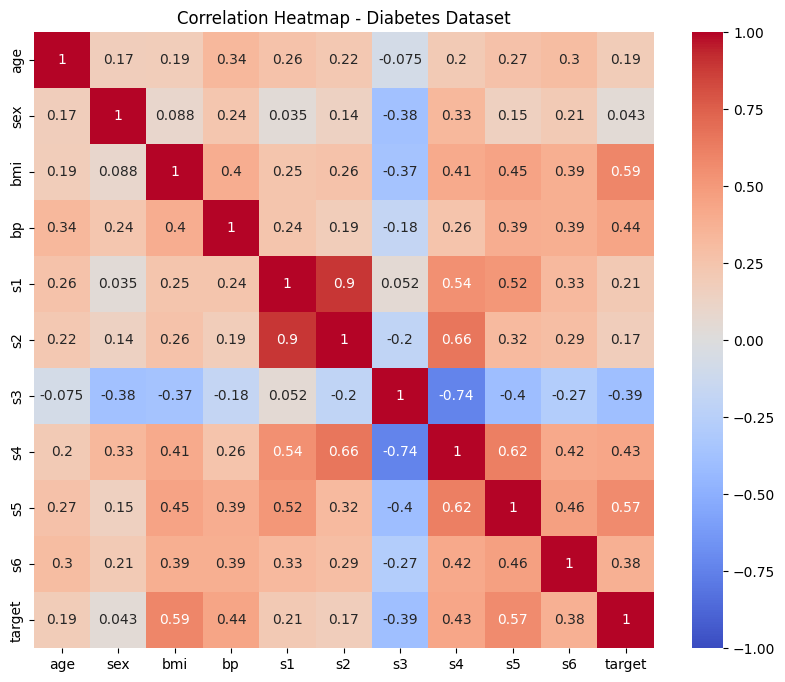

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# 데이터셋을 데이터프레임으로 변환
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# target 변수 추가
df['target'] = diabetes.target

# 상관관계 행렬 계산
corr_matrix = df.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Diabetes Dataset')
plt.show()

In [79]:
# 모델링 2차 학습 및 평가
# x = df.drop(columns=['target'])
x = df[['bmi', 'bp', 's1', 's4', 's5', 's6']]
y = df['target']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.4, random_state=42)

model = LinearRegression()
model.fit(train_x, train_y)

print("훈련 데이터셋 R^2 : {}".format(model.score(train_x, train_y)))
print("평가용 데이터셋 R^2 : {}".format(model.score(val_x, val_y)))
print("테스트 데이터셋 R^2 : {}".format(model.score(test_x, test_y)))

훈련 데이터셋 R^2 : 0.5003882313720589
평가용 데이터셋 R^2 : 0.501071177028777
테스트 데이터셋 R^2 : 0.4312386349786036
